In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [54]:
file = '//home//vinicius//Data_Science//Notebooks//Data_Files//u.data'
file2 = '//home//vinicius//Data_Science//Notebooks//Data_Files//Movie_Id_Titles'
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df1 = pd.read_table(file,names=columns)

In [55]:
df1.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [57]:
df2 = pd.read_csv(file2)

In [58]:
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [59]:
df3 = pd.merge(df1,df2, on='item_id')

In [60]:
df3.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [61]:
df3.groupby('title')['rating'].mean().sort_values(ascending=False).head(15)

title
Marlene Dietrich: Shadow and Light (1996)            5.000
Prefontaine (1997)                                   5.000
Santa with Muscles (1996)                            5.000
Star Kid (1997)                                      5.000
Someone Else's America (1995)                        5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Saint of Fort Washington, The (1993)                 5.000
Great Day in Harlem, A (1994)                        5.000
They Made Me a Criminal (1939)                       5.000
Aiqing wansui (1994)                                 5.000
Pather Panchali (1955)                               4.625
Anna (1996)                                          4.500
Everest (1998)                                       4.500
Maya Lin: A Strong Clear Vision (1994)               4.500
Some Mother's Son (1996)                             4.500
Name: rating, dtype: float64

**Unknown movies with high rate, probably movies with only one rating**  
Below we have the movies with most ratings

In [62]:
df3.groupby('title')['rating'].count().sort_values(ascending=False).head(15)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: rating, dtype: int64

In [71]:
df_ratings = pd.DataFrame(df3.groupby('title')['rating'].mean())

In [72]:
df_ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [74]:
df_ratings['count'] = pd.DataFrame(df3.groupby('title')['rating'].count()) 

In [77]:
df_ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


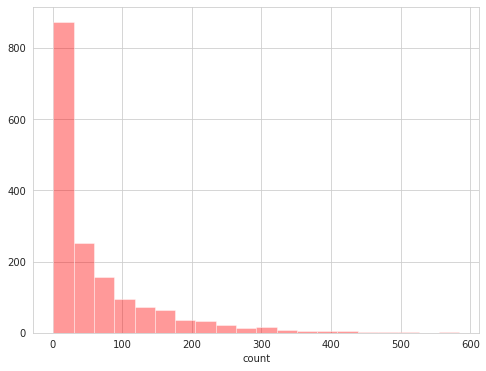

In [134]:
plt.figure(figsize=(8,6))
sns.distplot(df_ratings['count'], bins=20, kde=False, color='Red')

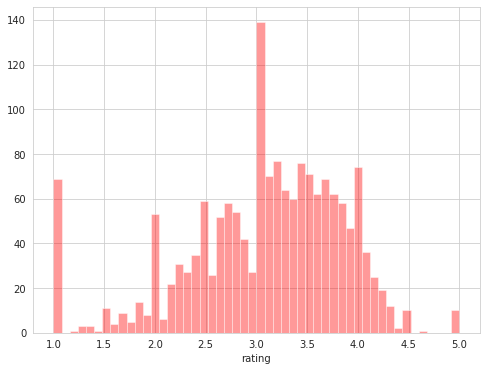

In [136]:
plt.figure(figsize=(8,6))
sns.distplot(df_ratings['rating'], bins=50, kde=False, color='Red')

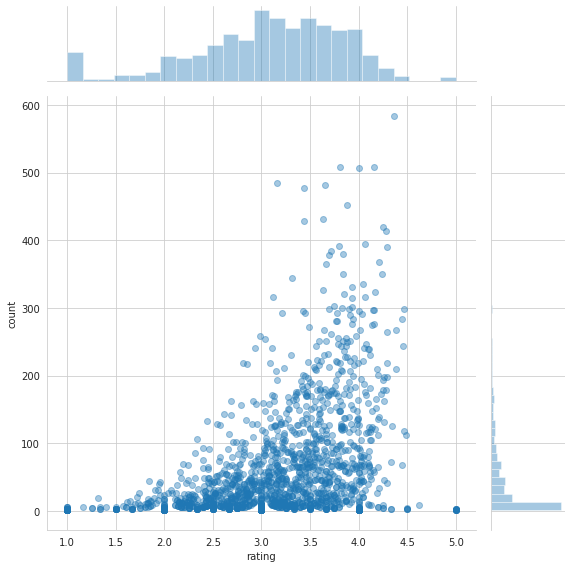

In [140]:
sns.jointplot(x='rating', y='count', data=df_ratings, alpha=0.4, height=8)

In [142]:
moved = df3.pivot_table(index='user_id', columns='title', values='rating')

In [143]:
moved.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df_ratings.sort_values('count', ascending=False)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


**Create model to Start Wars and to Liar Liar**

In [145]:
star_wars_user_ratings = moved['Star Wars (1977)']

In [149]:
liar_user_rating = moved['Liar Liar (1997)']

In [151]:
similar_SW = moved.corrwith(star_wars_user_ratings)

/home/vinicius/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/vinicius/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [152]:
similar_LL = moved.corrwith(liar_user_rating)

/home/vinicius/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/vinicius/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [157]:
corr_SW = pd.DataFrame(similar_SW, columns=['Correlation'])
corr_SW.dropna(inplace=True)

In [159]:
corr_LL = pd.DataFrame(similar_LL, columns=['Correlation'])
corr_LL.dropna(inplace=True)

In [ ]:
corr_SW = corr_SW.join(df_ratings['count'])

In [165]:
corr_SW[corr_SW['count']>100].sort_values('Correlation',ascending=False).head(20)

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [ ]:
corr_LL = corr_LL.join(df_ratings['count'])

In [172]:
corr_LL[corr_LL['count']>100].sort_values('Correlation', ascending=False).head()

,Correlation,count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
